## Auto Spelling Correction

**In this Notebook we will go through the process of spelling correction using different NLP models**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving imdb_master.csv to imdb_master.csv


In [1]:
import numpy as np
np.random.seed(13)
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from collections import defaultdict
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')
from nltk.stem import PorterStemmer
from nltk.stem.snowball import *
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize as WordTokenizer
# Importing all required libraries for this task.
from nltk.util import ngrams
from nltk.metrics.distance import edit_distance
from nltk.corpus import words
from nltk.tokenize import RegexpTokenizer
from itertools import chain
import json
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import *
from nltk.corpus import wordnet as wn
import time
from tqdm import tqdm
from difflib import SequenceMatcher
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df = pd.read_csv("imdb_master.csv",encoding="latin-1")
df.head(10)

import pandas as pd
import io
# df = pd.read_csv(io.StringIO(uploaded['imdb_master.csv'].decode('latin-1')))


In [12]:
 df.head(10)

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
5,5,test,"A funny thing happened to me while watching ""M...",neg,10004_2.txt
6,6,test,This German horror film has to be one of the w...,neg,10005_2.txt
7,7,test,"Being a long-time fan of Japanese film, I expe...",neg,10006_2.txt
8,8,test,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg,10007_4.txt
9,9,test,Wealthy horse ranchers in Buenos Aires have a ...,neg,10008_4.txt


# EDA & data cleaning and preprocessing

**EDA & Cleaning & Noising: Fares**

**Data Preprocessing: Zulfiqar**

## EDA

**In this part we explore the dataset to see what we are dealing with**

In [13]:
df_train = df[df['type']=='train'].reset_index(drop=True)

In [14]:
df.label.unique()

array(['neg', 'pos', 'unsup'], dtype=object)

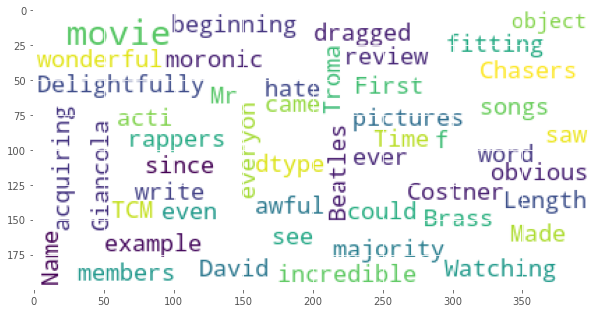

In [15]:
#Creating the word cloud to see what are the most common words in the dataset
cloud_data = str(df["review"])
stopwordss=set(stopwords.words('english'))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwordss,
                          max_words=300,
                          max_font_size=25, 
                          random_state=42
                         ).generate(cloud_data)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud)

**We see the number of reviews on each class to understand the nature of the words in the dataset**

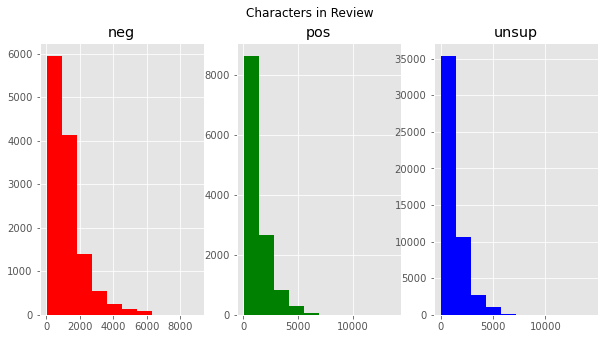

In [16]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
df_train_len=df_train[df_train['label']=='neg']['review'].str.len()
ax1.hist(df_train_len,color='red')
ax1.set_title('neg')
df_train_len=df_train[df_train['label']=='pos']['review'].str.len()
ax2.hist(df_train_len,color='green')
ax2.set_title('pos')
df_train_len=df_train[df_train['label']=='unsup']['review'].str.len()
ax3.hist(df_train_len,color='blue')
ax3.set_title('unsup')
fig.suptitle('Characters in Review')
plt.show()

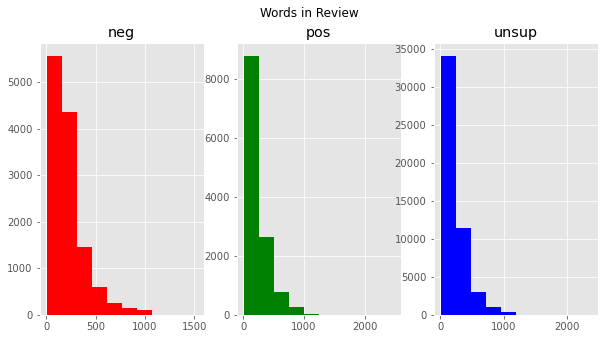

In [17]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
df_train_len=df_train[df_train['label']=='neg']['review'].str.split().map(lambda x: len(x))
ax1.hist(df_train_len,color='red')
ax1.set_title('neg')
df_train_len=df_train[df_train['label']=='pos']['review'].str.split().map(lambda x: len(x))
ax2.hist(df_train_len,color='green')
ax2.set_title('pos')
df_train_len=df_train[df_train['label']=='unsup']['review'].str.split().map(lambda x: len(x))
ax3.hist(df_train_len,color='blue')
ax3.set_title('unsup')
fig.suptitle('Words in Review')
plt.show()


**Creating our corpus by taking the colum of reviews and adding it to our corpus to perform the NLP-specific EDA on**

In [18]:

corpus=[]
for x in df_train['review'].str.split():
    for i in x:
        corpus.append(i)


In [19]:

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 


**Reviewing the number of stopwords in the dataset**

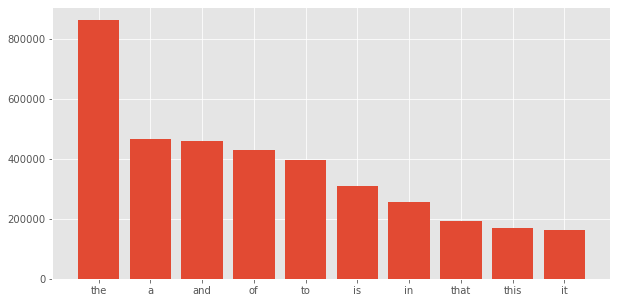

In [20]:
plt.figure(figsize=(10,5))
x,y=zip(*top)
plt.bar(x,y)
plt.show()

**Viewing the number of punctuation in the dataset**

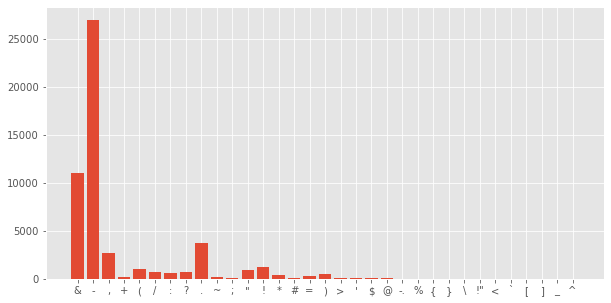

In [21]:
plt.figure(figsize=(10,5))
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.show()


**Viewing the most common words in the dataset**

<AxesSubplot:>

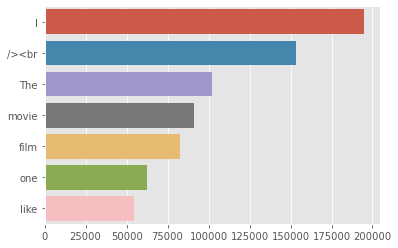

In [22]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop_words) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)


## Data Cleaning

**Here we start to clean our dataset from all the unnecessary data using some helper functions based on Regex**

<ul>
    <li><strong>URL_remove:</strong> this function removes any URLs from the dataset</li>
    <li><strong>html_remove:</strong> this function removes any HTML tags from the dataset</li>
    <li><strong>emoji_remove:</strong> as this is a movie review, it can be written from mobile phones and containing emojis; this function removes any emojis in the dataset</li>
    <li><strong>punct_remove:</strong> this function removes all the punctiuation as it is useless and makes the dataset so big and adding a lot of computational power</li>
    <li><strong>text_cleaning:</strong> this is a general function that contains some regex expressions to perform further cleaning on the data</li>
    <li><strong>str.lower:</strong> this function call from str library makes all the characters is lowercase</li>
</ul>

In [23]:
def URL_remove(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def html_remove(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def emoji_remove(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def punct_remove(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def text_cleaning(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text


In [24]:

df['review']=df['review'].apply(lambda x : URL_remove(x))
df['review']=df['review'].apply(lambda x : html_remove(x))
df['review']=df['review'].apply(lambda x: emoji_remove(x))
# df['review']=df['review'].apply(lambda x : punct_remove(x))
# df['review']=df['review'].apply(lambda x: text_cleaning(x))
df['review']=df['review'].str.lower()
df=df.drop(['Unnamed: 0', 'file'], axis=1)


**Splitting the data into training and testing after cleaning**

In [25]:

df_train_clean = df[df['type']=='train'].reset_index(drop=True)
df_test_clean = df[df['type']=='test'].reset_index(drop=True)
df_train_clean.head()


,type,review,label
0,train,story of a man who has unnatural feelings for ...,neg
1,train,airport '77 starts as a brand new luxury 747 p...,neg
2,train,this film lacked something i couldn't put my f...,neg
3,train,"sorry everyone,,, i know this is supposed to b...",neg
4,train,when i was little my parents took me along to ...,neg


In [26]:
len(df_train_clean["review"])
df_train_clean["review"][0].split('.')


['story of a man who has unnatural feelings for a pig',
 ' starts out with a opening scene that is a terrific example of absurd comedy',
 " a formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers",
 ' unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting',
 ' even those from the era should be turned off',
 ' the cryptic dialogue would make shakespeare seem easy to a third grader',
 " on a technical level it's better than you might think with some good cinematography by future great vilmos zsigmond",
 ' future stars sally kirkland and frederic forrest can be seen briefly',
 '']

In [27]:
splitted_reviews=[]
splitted_reviews_sentences=[]
for i in range(len(df_train_clean["review"])-74000):
    splitted_reviews+=df_train_clean["review"][i].split(' ')
    #splitted_reviews_sentences.append(df_train_clean["review"][i].split('.'))
    splitted_reviews_sentences+=df_train_clean["review"][i].split('.')

    
len(splitted_reviews)
print(splitted_reviews_sentences[0])
len(splitted_reviews_sentences)
len(splitted_reviews)


story of a man who has unnatural feelings for a pig


215413

In [28]:

upd_splitted_reviews_sentences=[]
for i in splitted_reviews_sentences:
    x=punct_remove(i)
    xx=text_cleaning(x)
    upd_splitted_reviews_sentences.append(xx)

In [29]:
upd_splitted_reviews_words=[]
for i in splitted_reviews:
    x=punct_remove(i)
    xx=text_cleaning(x)
    upd_splitted_reviews_words.append(xx)

In [30]:
[x.strip() for x in upd_splitted_reviews_words if x.strip()]
[x.strip() for x in upd_splitted_reviews_sentences if x.strip()]

['story of a man who has unnatural feelings for a pig',
 'starts out with a opening scene that is a terrific example of absurd comedy',
 'a formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers',
 'unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting',
 'even those from the era should be turned off',
 'the cryptic dialogue would make shakespeare seem easy to a third grader',
 'on a technical level its better than you might think with some good cinematography by future great vilmos zsigmond',
 'future stars sally kirkland and frederic forrest can be seen briefly',
 'airport  starts as a brand new luxury  plane is loaded up with valuable paintings  such belonging to rich businessman philip stevens james stewart who is flying them  a bunch of vips to his estate in preparation of it being opened to the public as a museum also on board is stevens daughter julie kathleen quinlan  her so

In [31]:
splitted_reviews_sentences=[]
splitted_reviews=[]

splitted_reviews_sentences=upd_splitted_reviews_sentences
splitted_reviews=upd_splitted_reviews_words

In [32]:
# filter(None, splitted_reviews_sentences)
splitted_reviews_sentences = [x for x in splitted_reviews_sentences if x != '']
# splitted_reviews_sentences = [x for x in splitted_reviews_sentences if len(x) <= 5]

splitted_reviews_sentences[0:10]

['story of a man who has unnatural feelings for a pig',
 ' starts out with a opening scene that is a terrific example of absurd comedy',
 ' a formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers',
 ' unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting',
 ' even those from the era should be turned off',
 ' the cryptic dialogue would make shakespeare seem easy to a third grader',
 ' on a technical level its better than you might think with some good cinematography by future great vilmos zsigmond',
 ' future stars sally kirkland and frederic forrest can be seen briefly',
 'airport  starts as a brand new luxury  plane is loaded up with valuable paintings  such belonging to rich businessman philip stevens james stewart who is flying them  a bunch of vips to his estate in preparation of it being opened to the public as a museum also on board is stevens daughter julie kathleen quinlan 

In [33]:
ss=splitted_reviews_sentences
u_splitted_reviews_sentences=[]
for i in ss:
    if(len(i)==10):
        continue
    else:
        u_splitted_reviews_sentences.append(i)

splitted_reviews_sentences=[]
splitted_reviews_sentences=u_splitted_reviews_sentences


**As our mission is to perform spelling correction on misspelled words; we must have misspelled words which called noised words. In the block below we create the noised dataset by taking each sentence in the review and review by review and noising it, then saving the noised dataset into a file for future use**

In [34]:
from neuspell.noising import WordReplacementNoiser

word_repl_noiser = WordReplacementNoiser(language="english")
word_repl_noiser.load_resources()
noise_texts = word_repl_noiser.noise(splitted_reviews_sentences)

with open('noised_data.txt', 'w') as filehandle:
    filehandle.writelines("%s ,\n" % review for review in noise_texts)

Utilizing resources existing in folder C:\ProgramData\Anaconda3\lib\site-packages\neuspell\../data\noising_resources\en-word-replacement-noise
Utilizing resources existing in folder C:\ProgramData\Anaconda3\lib\site-packages\neuspell\../data\noising_resources\en-word-replacement-noise
total # of texts after retokenization: 11822
total # of tokens after retokenization: 215091
total lines in inp to noisyfy_word_tokens: 11822
total tokens in inp to noisyfy_word_tokens: 215091


  0%|          | 0/11822 [00:00<?, ?it/s]

unique tokens overlapped with replacement lookup: 7498
total tokens overlapped with replacement lookup: 188033
overlap percent wrt original_sentences: 87.4202
overlap percent wrt mistakes_vocab: 41.3500
22.8780% of overlapped tokens will get replaced to match the total % of misspellings to 20.0000%
Percentage of tokens that actually got replaced 42187/215091=19.6136%
No of tokens in mistakes_mappings queried: 4373


**Example of noised review**

In [35]:
noise_texts [0]

'strory of a man who has unaturral feelings for a pig'

In [20]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    #ps = PorterStemmer()
    ps=SnowballStemmer(language="english")

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix



def get_count(words):
    word_count_dict = {}
    word_count_dict = Counter(words)
    return word_count_dict

#word_count_dict = get_count(book_words) # dictionary with the count

# calculate probability of the occurrence
def occurr_prob(word_count_dict):
    probs = {}
    m = sum(word_count_dict.values())
    for key in word_count_dict:
        probs[key] = word_count_dict[key]/m #calculate prob for each word
    return probs


In [21]:
#from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))     
filtered_sentence = [w for w in splitted_reviews if not w in stop_words]   
filtered_sentence


print(len(filtered_sentence)) 
filtered_sentence


114307


['story',
 'man',
 'unnatural',
 'feelings',
 'pig',
 'starts',
 'opening',
 'scene',
 'terrific',
 'example',
 'absurd',
 'comedy',
 'formal',
 'orchestra',
 'audience',
 'turned',
 'insane',
 'violent',
 'mob',
 'crazy',
 'chantings',
 'singers',
 'unfortunately',
 'stays',
 'absurd',
 'whole',
 'time',
 'general',
 'narrative',
 'eventually',
 'making',
 'putting',
 'even',
 'era',
 'turned',
 'cryptic',
 'dialogue',
 'would',
 'make',
 'shakespeare',
 'seem',
 'easy',
 'third',
 'grader',
 'technical',
 'level',
 'better',
 'might',
 'think',
 'good',
 'cinematography',
 'future',
 'great',
 'vilmos',
 'zsigmond',
 'future',
 'stars',
 'sally',
 'kirkland',
 'frederic',
 'forrest',
 'seen',
 'briefly',
 'airport',
 '',
 'starts',
 'brand',
 'new',
 'luxury',
 '',
 'plane',
 'loaded',
 'valuable',
 'paintings',
 '',
 'belonging',
 'rich',
 'businessman',
 'philip',
 'stevens',
 'james',
 'stewart',
 'flying',
 '',
 'bunch',
 'vips',
 'estate',
 'preparation',
 'opened',
 'public',
 

In [ ]:
lmtzr = SnowballStemmer(language="english")
lemmatized_words = [lmtzr.stem(word) for word in filtered_sentence]
lemmatized_words


# show dependences

nourhan

In [37]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-dep


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --no-dep (--no-dependencies, --no-deps?)


In [38]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [41]:
for i in splitted_reviews_sentences[0:100]:
    
    doc = nlp(i)
    
    for sent in doc.sents:
        docx = nlp(sent.text)
        if docx.ents:
            displacy.render(docx, style='ent', jupyter=True)
        else:
            
            print(docx.text)


story of a man who has unnatural feelings for a pig
 starts out with a opening scene that is a terrific example of absurd comedy
 a formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers
 unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting
 even those from the era should be turned off


 on a technical level its better than you might think with some good cinematography by future great vilmos zsigmond


airport  starts as a brand new luxury  
plane is loaded up with valuable paintings  


 the luxury jetliner takes off as planned but midair


they plan to steal the valuable cargo  land on a disused plane strip on an isolated island but while making his descent chambers almost hits an oil rig in the ocean  loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the bermuda triangle
 with air in short supply water leaking in  having flown over  miles off course
the problems mount for the survivors as they await help with time fast running out
also known under the slightly different tile airport  


while once again like its predecessors
i cant say airport  
is any sort of forgotten classic it is entertaining although not necessarily for the right reasons


then the crashing didnt he see the oil rig  sinking of the  maybe the makers were trying to cross the original airport with another popular disaster flick of the period the poseidon adventure   submerged is where it stays until the end with a stark dilemma facing those trapped inside either suffocate when the air runs out or drown as the  floods or if any of the doors are opened  its a decent idea that could have made for a great little disaster flick but
bad unsympathetic characters dull dialogue lethargic setpieces  a real lack of danger or suspense or tension
means this is a missed opportunity


theres not as much urgency as i thought there should have been


but theres just something lacking here


the discovery or another couple of dead bodies including the navigator
 while i would like to see this extra footage


 as expected the film has dated badly with horrible fashions  interior design choices
i will say no more other than the toy plane model effects arent great either


so i reckon thats a little harsh
 the action scenes are a little dull
unfortunately the pace is slow  not much excitement or tension is generated which is a shame as i reckon this could have been a pretty good film if made properly
the production values are alright if nothing spectacular
 the acting isnt


i liked the ideas behind it even if they were a bit silly the production  
bland direction doesnt help though  
a film about a sunken plane just shouldnt be this boring or lethargic
 followed by the concorde


 this inevitably translated to lack of chemistry when she shared the screen with her leading man
 even the romantic scenes came across as being merely the actors at play
 it could very well have been the director who miscalculated what he needed from the actors
 i just dont know
but could it have been the screenplay just exactly who was the chef in love with
he seemed more enamored of his culinary skills and restaurant and ultimately of himself and his youthful exploits than of anybody or anything else
 he never convinced me he was in love with the princess
i was disappointed in this movie
 but dont forget it was nominated for an oscar
so judge for yourself
sorry everyone
i know this is supposed to be an art film
but wow they should have handed out guns at the screening
so people could blow their brains out and not watch
 although the scene design and photographic direction was excellent this story is too painful to watch
 the absence of a sound track was brutal
 the loooonnnnng shots 

 i really had a hard time just getting through this film
 the performances were excellent but how much of that dark sombre uninspired stuff can you take the only thing i liked


 otherwise this was a ripoff of bergman
 and im
no fan f his either
 i think anyone who says they enjoyed   hours of this is well lying
when i was little my parents took me along to the theater to see interiors
 it was one of many movies i watched with my parents
but this was the only one we walked out of
 since then i had never seen interiors until just recently
and i could have lived out the rest of my life without it
 what a pretentious ponderous and painfully boring piece of  wine and cheese tripe


 in the unmistakable style of ingmar berman allen gives us a dark angular muted insight in to the lives of a family wrought by the psychological damage caused by divorce estrangement career love nonlove halitosis
whatever
 the film intentionally has no comic relief no music and is drenched in shadowy pathos
 this film style can be best defined as expressionist in nature using an improvisational method of dialogue to illicit a more pronounced depth of meaning and truth


 the film is painfully slow and dull
 but beyond that i simply had no connection with or sympathy for any of the characters
 instead i felt only contempt for this parade of shuffling whining nicotine stained martyrs in a perpetual quest for identity


the story looms like a fart in the room
 everyone speaks in affected platitudes and elevated language between cigarettes
 everyone is lost and struggling desperate to find direction or understanding or whatever
and it just goes on and on to the point where you just want to slap all of them
 its never about resolution its only about interminable introspective babble
 it is nothing more than a psychological drama taken to an extreme beyond the audiences ability to connect


we feel left out
 and for that reason i found this movie painfully self indulgent and spiritually draining
 i see what he was going for but his insistence on promoting his message through prozac prose and distorted film techniques jettisons it past the point of relevance
 i highly recommend this one if youre feeling a little too happy and need something to remind you of death
 otherwise lets just pretend this film never happened
it appears that many critics find the idea of a woody allen drama unpalatable
 and for good reason they are unbearably wooden and pretentious imitations of bergman
 and lets not kid
ourselves critics were mostly supportive of allens bergman pretensions allens whining accusations to the contrary notwithstanding


view its a strange form of cultural snobbery
 i would have to agree with that


the results oscar wilde said it best in reference to dickens the old curiosity shop one would have to have a heart of stone not to laugh out loud at the death of little nell
 pretty much the same thing here
 interiors is chock full of solemnly intoned howlers
 i
m afraid of my anger
 looking into the middle distance
i dont like who im becoming
 the directorial quotations to use a polite term from bergman are close to parody
 the incredibly selfinvolved family keep reminding us of how brilliant and talented they are to the point of strangulation


 it was in  
i dont know  the new yorker
 oh
 that was an old poem
 i reworked it
 far from not caring about these people however i found them quite hilarious
 much of the dialog is exactly like the funny stuff from allens earlier films  


 it all comes through in the shopworn visualaural tricks the deafening scratching of a pencil on paper the towering surf that dwarfs the people walking on the beach
 etc etc
allens later serious films are less embarrassing but also far less entertaining
 ill take interiors
 woodys rarely made a funnier movie
i dont know who to blame the timid writers or the clueless director


 this could have been very entertaining but there was a veil of timidity even cowardice that hung over each scene


 what a waste not just for the viewers but for the actors as well
this film is mediocre at best
 angie harmon is as funny as a bag of hammers


# TFIDF

nourhan

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
VecModel = TfidfVectorizer()
X_Vec = VecModel.fit_transform(splitted_reviews_sentences)
X_Vec = pd.DataFrame.sparse.from_spmatrix(X_Vec)

print(f'The new shape for splitted_reviews_sentences is {X_Vec.shape}')
X_Vec.head()

The new shape for splitted_reviews_sentences is (11822, 17141)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17101,17102,17103,17104,17105,17106,17107,17108,17109,17110,17111,17112,17113,17114,17115,17116,17117,17118,17119,17120,17121,17122,17123,17124,17125,17126,17127,17128,17129,17130,17131,17132,17133,17134,17135,17136,17137,17138,17139,17140
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for i in range(5) : 
    print(sorted(list(X_Vec.iloc[i,:]),reverse = True)[:20])
    print('--------------------------------------------------')

[0.5241367706933014, 0.5021928630466667, 0.4370334510556838, 0.2978028142848171, 0.24002383315344322, 0.2250974043520934, 0.21036999387044567, 0.16702324887880263, 0.11386675748341803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------------------------------------
[0.4501590690847996, 0.3941115112019815, 0.3520176092809746, 0.33914252880480483, 0.33118586638107694, 0.3181350720741892, 0.26908795396552204, 0.2097554959510017, 0.16756185415487168, 0.14009877866285017, 0.12440889156913193, 0.11232526382541858, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------------------------------------
[0.3455892532576134, 0.3455892532576134, 0.3455892532576134, 0.3311205514202602, 0.3311205514202602, 0.29191744042075396, 0.2761509879520568, 0.25406106318922983, 0.2352878469715967, 0.21096126178481203, 0.1656186151028339, 0.13490973350356708, 0.13447425978062566, 0.13099458213157403, 0.08315464757917702, 0.07507797561599909, 0.05577534633095104, 0, 0, 0]
-------------------------------------------------

# continuous bag of words

nourhan

In [98]:
import sys
!{sys.executable} -m pip install emoji # to resolve: ModuleNotFoundError: No module named 'emoji'

import re
import nltk
from nltk.tokenize import word_tokenize
import numpy as np


nltk.download('punkt')  # download pre-trained Punkt tokenizer for English

ERROR: Invalid requirement: '#'
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nourhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
len(splitted_reviews)

215413

In [139]:
#tokenizing
import nltk
nltk.download('punkt')
tokens=[]
tokens = [word_tokenize(sent) for sent in splitted_reviews]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nourhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [141]:

words = tokens
vocab=[]
for i in words:
    if(i in vocab):
        continue
    else:
        vocab.append(i)


In [198]:
len(vocab)

5000

In [143]:

#convert the lists in list int strings in list
vocab = [''.join(ele) for ele in vocab]


In [144]:
vocab

['story',
 'of',
 'a',
 'man',
 'who',
 'has',
 'unnatural',
 'feelings',
 'for',
 'pig',
 'starts',
 'out',
 'with',
 'opening',
 'scene',
 'that',
 'is',
 'terrific',
 'example',
 'absurd',
 'comedy',
 'formal',
 'orchestra',
 'audience',
 'turned',
 'into',
 'an',
 'insane',
 'violent',
 'mob',
 'by',
 'the',
 'crazy',
 'chantings',
 'its',
 'singers',
 'unfortunately',
 'it',
 'stays',
 'whole',
 'time',
 'no',
 'general',
 'narrative',
 'eventually',
 'making',
 'just',
 'too',
 'off',
 'putting',
 'even',
 'those',
 'from',
 'era',
 'should',
 'be',
 'cryptic',
 'dialogue',
 'would',
 'make',
 'shakespeare',
 'seem',
 'easy',
 'to',
 'third',
 'grader',
 'on',
 'technical',
 'level',
 'better',
 'than',
 'you',
 'might',
 'think',
 'some',
 'good',
 'cinematography',
 'future',
 'great',
 'vilmos',
 'zsigmond',
 'stars',
 'sally',
 'kirkland',
 'and',
 'frederic',
 'forrest',
 'can',
 'seen',
 'briefly',
 'airport',
 '',
 'as',
 'brand',
 'new',
 'luxury',
 'plane',
 'loaded',
 '

In [152]:
vocab=vocab[0:5000]

Dictionaries map every token in the vocab to a number to be used to grab the context of each sentence after that

In [153]:
# vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

Data bags (the context that make options of all hidden words in the sentence of 4 neighbours of the missed word), so it gives the whole examples if any of these five words are missed 

In [204]:
c=0
data = []
for i in range(2, len(words) - 2):
    
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    context = [''.join(ele) for ele in context]

    target = words[i][0]
    #print(c)
    #print(target[0])
    #c=c+1
    # target = [''.join(ele) for ele in target]

    data.append((context, target))
print(data[:5])

[(['story', 'of', 'man', 'who'], 'a'), (['of', 'a', 'who', 'has'], 'man'), (['a', 'man', 'has', 'unnatural'], 'who'), (['man', 'who', 'unnatural', 'feelings'], 'has'), (['who', 'has', 'feelings', 'for'], 'unnatural')]


-	Embeddings of our vocab size with specific input dimension was specified before of 10 (hyperparameter can be changed)



In [154]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))


the linear model as the hidden layer 

In [187]:
def linear(m, theta):
    w = theta
    return m.dot(w)

Log softmax + NLLloss = Cross Entropy that should be used in the last layer implemented manually referenced by Kaggle 

In [188]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())


In [189]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [190]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

forword function calculates the weights from the input layer to the output , backword function updates weight matrex based on the optimization function)

In [191]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

In [192]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

In [193]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [159]:
len(data)


213094

# training

In [157]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))


In [161]:
epoch_losses = {}

for epoch in range(8):

    losses =  []

    for context, target in data[0:1000]:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)
        #print(losses)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

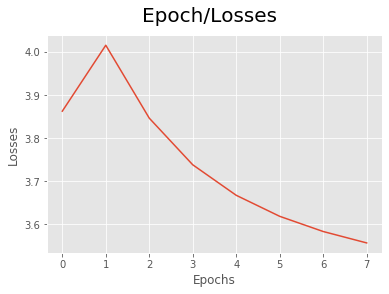

In [163]:
ix = np.arange(0,8)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [177]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word


In [178]:
predict(['a', 'story', 'a', 'man'])


'of'

then the accuracy is calculated if the target word is not the predicted add 1 to wrong variableand then use the following equation (1 - (wrong / len(data)

In [179]:
def accuracy():
    wrong = 0

    for context, target in data[0:5000]:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [180]:
accuracy()


0.9780190901667809